<a href="https://colab.research.google.com/github/Hemanth-Gattu/FaceMaskDetection/blob/main/PRML_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import seaborn as sns
import gdown
import glob

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import warnings

Data Mining 

In [ ]:
!7z x '/content/drive/MyDrive/prml_minor/Real-World-Masked-Face-Dataset-master.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/prml_minor/                                            1 file, 187072300 bytes (179 MiB)

Extracting archive: /content/drive/MyDrive/prml_minor/Real-World-Masked-Face-Dataset-master.zip
--
Path = /content/drive/MyDrive/prml_minor/Real-World-Masked-Face-Dataset-master.zip
Type = zip
Physical Size = 187072300
Comment = 241679901f6b95394b264cfbfd9f434c4139ec25

  0%     14% 3 - Real-World-Masked-Face-Dataset-master/RMFD_part_2.part2.rar                                                                    

In [ ]:
!7z x '/content/drive/MyDrive/prml_minor/self-built-masked-face-recognition-dataset.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/prml_minor/                                            1 file, 636274634 bytes (607 MiB)

Extracting archive: /content/drive/MyDrive/prml_minor/self-built-masked-face-recognition-dataset.zip
  6% 4096 Open               50% 32768 Open               --
Path = /content/drive/MyDrive/prml_minor/self-built-masked-face-recognition-dataset.zip
Type = zip
Physical Size = 636274634
64-bit = +

  0%      1% 1043 - self-built-masked-face-recogn . aset/baike/1_0_baike_0064.jpg                                       

In [ ]:
img = cv2.imread('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/anhu/0_0_5.jpg')

In [ ]:
!unrar x '/content/Real-World-Masked-Face-Dataset-master/RMFD_part_2.part1.rar' '/content/Real-World-Masked-Face-Dataset-master/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Real-World-Masked-Face-Dataset-master/RMFD_part_2.part1.rar

Creating    /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro  OK
Creating    /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000  OK
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/000.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/001.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/002.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/003.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/004.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/005.jpg       0%  OK 
E

In [ ]:
!unrar x '/content/Real-World-Masked-Face-Dataset-master/RMFD_part_3.part1.rar' '/content/Real-World-Masked-Face-Dataset-master'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Real-World-Masked-Face-Dataset-master/RMFD_part_3.part1.rar

Creating    /content/Real-World-Masked-Face-Dataset-master/single2-0  OK
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/1.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/10.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/100.jpg       1%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/101.jpg       8%  9%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/102.jpg      16% 17%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/103.jpg      17%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/104.jpg      18%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/

In [ ]:
im = cv2.imread('/content/Real-World-Masked-Face-Dataset-master/single2-0/1.jpg')

In [ ]:
import glob
print(len(glob.glob('/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/*/*.jpg')))
print(len(glob.glob('/content/Real-World-Masked-Face-Dataset-master/single2-0/*.jpg')))
print(len(glob.glob('/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_1/*/*.jpg')))
print(len(glob.glob('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/*/*.jpg')))
print(len(glob.glob('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/*/*.jpg')))

2813
298
1193
2118
90468


In [ ]:
paths = ['/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/*/*.jpg','/content/Real-World-Masked-Face-Dataset-master/single2-0/*.jpg',
         '/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_1/*/*.jpg','/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/*/*.jpg',
         '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/*/*.jpg']

In [ ]:
masked = []
unmasked = []
for j in range(4):
  for i in glob.glob(paths[j]):
    masked.append(i)

masked = sorted(masked)

for j in glob.glob(paths[-1]):
  unmasked.append(j)

unmasked = sorted(unmasked)


In [ ]:
print(cv2.imread(masked[0]))
print(unmasked[0])

[[[  4   5   3]
  [  9  10   8]
  [  3   3   3]
  ...
  [100 112 100]
  [ 89 103  91]
  [ 90 105  91]]

 [[  1   2   0]
  [  7   8   6]
  [  0   0   0]
  ...
  [ 92 103  93]
  [ 93 105  93]
  [ 91 105  93]]

 [[  5   5   5]
  [  5   5   5]
  [  2   2   2]
  ...
  [ 94 105  97]
  [ 93 104  94]
  [ 92 103  93]]

 ...

 [[ 29  26  21]
  [ 23  20  15]
  [ 34  31  26]
  ...
  [149 156 153]
  [141 148 145]
  [140 147 144]]

 [[ 27  24  19]
  [ 36  33  28]
  [ 29  26  21]
  ...
  [137 144 141]
  [143 150 147]
  [140 147 144]]

 [[ 15  12   7]
  [ 14  11   6]
  [ 19  16  11]
  ...
  [135 142 139]
  [145 152 149]
  [142 149 146]]]
/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/0_0_aidai_0014.jpg


# Data Visulalisation

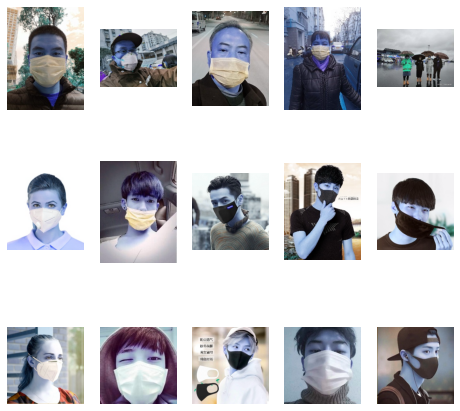

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = cv2.imread(masked[i])
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

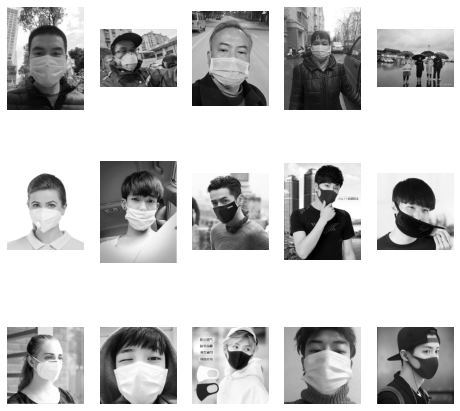

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = cv2.imread(masked[i])
    img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
plt.show()

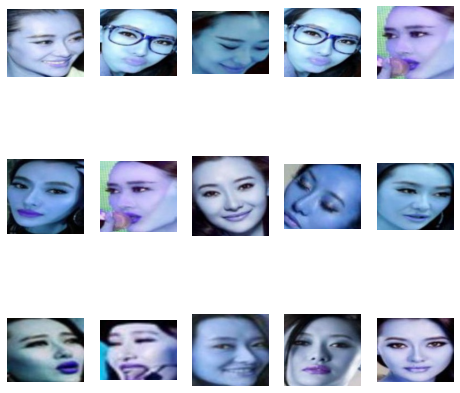

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = cv2.imread(unmasked[i])
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

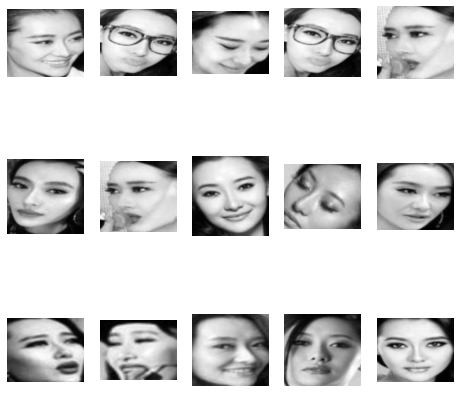

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = cv2.imread(unmasked[i])
    img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
plt.show()

# Data Preprocessing

In [ ]:
val_masked = masked[1200:1700]
val_unmasked = unmasked[3000:3500]

In [ ]:
test_masked = masked[1000:1010]
test_unmasked = unmasked[1000:1010]
test_labels  = []
for i in range(10):
  test_labels.append(1)
for i in range(10):
  test_labels.append(0)

In [ ]:
unmasked = unmasked[:1000]
masked = masked[:1000]

In [ ]:
labels = []
for i in range(len(masked)+len(unmasked)):
  if i <len(masked):
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
len(masked)+ len(masked)

2000

In [ ]:
val_labels  = []
for i in range(500):
  val_labels.append(1)
for i in range(500):
  val_labels.append(0)

In [ ]:
df = pd.DataFrame({'image':np.concatenate([(masked),(unmasked)]),'label':labels})
df_val = pd.DataFrame({'image':np.concatenate([(val_masked),(val_unmasked)]),'label':val_labels})
df_test = pd.DataFrame({'image':np.concatenate([(test_masked),(test_unmasked)]),'label':test_labels})
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
#df.head()
x = df.drop(columns=['label'])
y = df[['label']]

In [ ]:
df.head()

,image,label
0,/content/Real-World-Masked-Face-Dataset-master...,1
1,/content/Real-World-Masked-Face-Dataset-master...,1
2,/content/Real-World-Masked-Face-Dataset-master...,1
3,/content/Real-World-Masked-Face-Dataset-master...,1
4,/content/Real-World-Masked-Face-Dataset-master...,1


In [ ]:
mean = 0
std = 0
H=0
W=0
for i in df.values:
  path = i[0]
  img = cv2.imread(path)
  try:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h,w,f = img.shape
    H = H + h
    W = W + w
    img = img.reshape(-1,3)
    mean = np.mean(img, axis =0)/255 + mean
    std = np.std(img, axis = 0)/255 + std
  except:
    print(path)

mean = mean/len(df.values)
std = std/len(df.values)
H = H/len(df.values)
W = W/len(df.values)

print("mean ", mean)
print("standard deviation ", std)
print(H, W)



mean  [0.56157353 0.48844826 0.45872852]
standard deviation  [0.26021037 0.24493383 0.23474921]
171.9955 193.362


In [ ]:

mean = 0
std = 0
H=0
W=0
for i in df_val.values:
  path = i[0]
  img = cv2.imread(path)
  try:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h,w,f = img.shape
    H = H + h
    W = W + w
    img = img.reshape(-1,3)
    mean = np.mean(img, axis =0)/255 + mean
    std = np.std(img, axis = 0)/255 + std
  except:
    print(path)

mean = mean/len(df.values)
std = std/len(df.values)
H = H/len(df.values)
W = W/len(df.values)

print("mean ", mean)
print("standard deviation ", std)
print(H, W)



mean  [0.2964207  0.26059609 0.24993298]
standard deviation  [0.12871605 0.12292825 0.11740905]
97.095 100.342


In [ ]:
i = df[(df.image == '/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00415/011.jpg' )].index
df = df.drop(i)


**Validation Data**

In [ ]:
L = []
for i in df_val.values:
  k = cv2.imread(i[0])
  k.resize(175,175,3)
  L.append(k)

L = np.array(L)
L_ = np.reshape(L, (L.shape[0], -1))
L_.shape
P_ = df_val[['label']]

In [ ]:
L_ = L_/255
L_.shape
P_.shape

(1000, 1)

In [ ]:
std = StandardScaler()
L_ = std.fit_transform(L_)
data_val = pd.DataFrame(L_, columns = [i for i in range(91875)])
data_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91835,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874
0,1.564006,1.624905,1.619572,1.581191,1.640748,1.637188,1.578728,1.644152,1.649344,1.591168,1.652685,1.658920,1.582236,1.658293,1.660480,1.586756,1.659666,1.665026,1.603232,1.678499,1.668907,1.612033,1.683962,1.677684,1.621064,1.693983,1.684379,1.639967,1.709944,1.699960,1.665809,1.736977,1.713394,1.684050,1.754701,1.734876,1.681652,1.759028,1.749934,1.693770,...,-0.226962,-0.011390,-0.141672,-0.166886,-0.024359,-0.180636,-0.191930,0.097336,-0.082119,-0.097088,0.178506,-0.002881,-0.019688,0.179182,0.023220,0.003940,0.205480,0.073829,0.042951,0.104119,-0.039463,-0.043139,0.076731,-0.043093,-0.044982,0.054957,-0.025948,-0.041384,0.041561,-0.014870,-0.030484,0.006225,-0.049282,-0.066788,0.092564,0.037382,0.016878,0.049171,-0.007713,-0.026346
1,1.457329,1.458274,1.475082,1.498118,1.509756,1.504623,1.566869,1.572697,1.516767,1.437147,1.438712,1.370373,1.287056,1.255806,1.181486,0.986541,0.940057,0.888924,1.003783,0.948435,0.941849,1.094809,1.024670,1.045959,1.385179,1.316244,1.338153,1.651829,1.591228,1.592133,1.653907,1.617949,1.569269,1.648167,1.622997,1.553582,1.609677,1.578635,1.506893,1.681743,...,1.758165,1.731899,1.824676,1.771229,1.675929,1.763097,1.712481,1.626735,1.690571,1.652557,1.624141,1.684941,1.647237,1.660720,1.725744,1.682408,1.637310,1.700826,1.664399,1.668371,1.759844,1.707337,1.653469,1.746864,1.701452,1.620729,1.716849,1.668805,1.691639,1.786845,1.736011,1.750723,1.850372,1.791676,1.677109,1.774084,1.713997,1.607836,1.702265,1.639473
2,1.386212,0.791749,0.283033,1.343841,0.747620,0.239231,1.400834,0.810518,0.299468,1.377908,0.784903,0.276296,1.440549,0.853319,0.355222,1.410222,0.822089,0.327742,1.450431,0.889559,0.393576,1.423951,0.859847,0.366556,1.479533,0.914896,0.418862,1.485759,0.914549,0.418020,1.522981,0.975197,0.476321,1.504636,0.952506,0.453731,1.549698,1.013407,0.486119,1.537420,...,1.965911,2.261954,2.289449,2.059639,2.266307,2.299710,2.104905,2.278804,2.313408,2.162388,2.305142,2.335958,2.195108,2.305905,2.341550,2.195274,2.305498,2.339573,2.200993,2.330170,2.367718,2.224256,2.315458,2.367870,2.220662,2.278114,2.334089,2.184204,2.285192,2.327359,2.189257,2.312308,2.358559,2.212460,2.289320,2.369178,2.205577,2.314106,2.403480,2.277446
3,-0.439139,-0.148528,-0.030030,-0.424418,-0.133600,-0.013847,-0.401828,-0.106479,0.010208,-0.375563,-0.082879,0.035840,-0.342338,-0.046357,0.067826,-0.296271,-0.003692,0.112821,-0.265638,0.029968,0.143278,-0.221760,0.071051,0.187766,-0.148077,0.147613,0.263657,-0.056322,0.237870,0.358116,0.059000,0.356251,0.476321,0.129130,0.425691,0.550421,0.170184,0.472230,0.595488,0.214463,...,0.176988,0.035726,0.025169,0.063842,0.034679,0.034009,0.050450,0.500434,0.504785,0.505439,0.704191,0.708415,0.703035,0.418140,0.445832,0.446869,-0.283729,-0.263622,-0.237011,-0.521582,-0.501447,-0.466073,-0.151957,-0.128329,-0.103984,0.509151,0.542881,0.544297,0.552016,0.585701,0.585465,0.197403,0.204812,0.213735,0.416675,0.450304,0.449936,1.072045,1.099467,1.096014
4,1.646976,1.660612,1.619572,1.664263,1.688382,1.637188,1.673605,1.703697,1.613187,1.685950,1.712122,1.610829,1.688501,1.717482,1.624555,1.692676,1.718651,1.629206,1.697263,1.725600,1.668907,1.682563,1.731054,1.677684,1.668242,1.729396,1.684379,1.663691,1.745558,1.699960,1.725320,1.772685,1.713394,1.731893,1.790620,1.710704,1.765622,1.807132,1.664869,1.645662,...,0.996430,2.038153,1.777007,1.113655,2.006541,1.775021,1.135387,2.065400,1.906168,1.281771,2.078142,1.914003,1.320846,2.162531,1.979311,1.402664,2.126519,1.941862,1.372772,2.209843,2.015151,1.413633,2.146952,1.953866,1.359245,2.110779,1.946801,1.352537,2.059642,1.882936,1.317631,2.049439,1.838272,1.300761,1.881179,1.676926,1

In [ ]:
data_val['label'] = P_.values.ravel()
data_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874,label
0,1.564006,1.624905,1.619572,1.581191,1.640748,1.637188,1.578728,1.644152,1.649344,1.591168,1.652685,1.658920,1.582236,1.658293,1.660480,1.586756,1.659666,1.665026,1.603232,1.678499,1.668907,1.612033,1.683962,1.677684,1.621064,1.693983,1.684379,1.639967,1.709944,1.699960,1.665809,1.736977,1.713394,1.684050,1.754701,1.734876,1.681652,1.759028,1.749934,1.693770,...,-0.011390,-0.141672,-0.166886,-0.024359,-0.180636,-0.191930,0.097336,-0.082119,-0.097088,0.178506,-0.002881,-0.019688,0.179182,0.023220,0.003940,0.205480,0.073829,0.042951,0.104119,-0.039463,-0.043139,0.076731,-0.043093,-0.044982,0.054957,-0.025948,-0.041384,0.041561,-0.014870,-0.030484,0.006225,-0.049282,-0.066788,0.092564,0.037382,0.016878,0.049171,-0.007713,-0.026346,1
1,1.457329,1.458274,1.475082,1.498118,1.509756,1.504623,1.566869,1.572697,1.516767,1.437147,1.438712,1.370373,1.287056,1.255806,1.181486,0.986541,0.940057,0.888924,1.003783,0.948435,0.941849,1.094809,1.024670,1.045959,1.385179,1.316244,1.338153,1.651829,1.591228,1.592133,1.653907,1.617949,1.569269,1.648167,1.622997,1.553582,1.609677,1.578635,1.506893,1.681743,...,1.731899,1.824676,1.771229,1.675929,1.763097,1.712481,1.626735,1.690571,1.652557,1.624141,1.684941,1.647237,1.660720,1.725744,1.682408,1.637310,1.700826,1.664399,1.668371,1.759844,1.707337,1.653469,1.746864,1.701452,1.620729,1.716849,1.668805,1.691639,1.786845,1.736011,1.750723,1.850372,1.791676,1.677109,1.774084,1.713997,1.607836,1.702265,1.639473,1
2,1.386212,0.791749,0.283033,1.343841,0.747620,0.239231,1.400834,0.810518,0.299468,1.377908,0.784903,0.276296,1.440549,0.853319,0.355222,1.410222,0.822089,0.327742,1.450431,0.889559,0.393576,1.423951,0.859847,0.366556,1.479533,0.914896,0.418862,1.485759,0.914549,0.418020,1.522981,0.975197,0.476321,1.504636,0.952506,0.453731,1.549698,1.013407,0.486119,1.537420,...,2.261954,2.289449,2.059639,2.266307,2.299710,2.104905,2.278804,2.313408,2.162388,2.305142,2.335958,2.195108,2.305905,2.341550,2.195274,2.305498,2.339573,2.200993,2.330170,2.367718,2.224256,2.315458,2.367870,2.220662,2.278114,2.334089,2.184204,2.285192,2.327359,2.189257,2.312308,2.358559,2.212460,2.289320,2.369178,2.205577,2.314106,2.403480,2.277446,1
3,-0.439139,-0.148528,-0.030030,-0.424418,-0.133600,-0.013847,-0.401828,-0.106479,0.010208,-0.375563,-0.082879,0.035840,-0.342338,-0.046357,0.067826,-0.296271,-0.003692,0.112821,-0.265638,0.029968,0.143278,-0.221760,0.071051,0.187766,-0.148077,0.147613,0.263657,-0.056322,0.237870,0.358116,0.059000,0.356251,0.476321,0.129130,0.425691,0.550421,0.170184,0.472230,0.595488,0.214463,...,0.035726,0.025169,0.063842,0.034679,0.034009,0.050450,0.500434,0.504785,0.505439,0.704191,0.708415,0.703035,0.418140,0.445832,0.446869,-0.283729,-0.263622,-0.237011,-0.521582,-0.501447,-0.466073,-0.151957,-0.128329,-0.103984,0.509151,0.542881,0.544297,0.552016,0.585701,0.585465,0.197403,0.204812,0.213735,0.416675,0.450304,0.449936,1.072045,1.099467,1.096014,1
4,1.646976,1.660612,1.619572,1.664263,1.688382,1.637188,1.673605,1.703697,1.613187,1.685950,1.712122,1.610829,1.688501,1.717482,1.624555,1.692676,1.718651,1.629206,1.697263,1.725600,1.668907,1.682563,1.731054,1.677684,1.668242,1.729396,1.684379,1.663691,1.745558,1.699960,1.725320,1.772685,1.713394,1.731893,1.790620,1.710704,1.765622,1.807132,1.664869,1.645662,...,2.038153,1.777007,1.113655,2.006541,1.775021,1.135387,2.065400,1.906168,1.281771,2.078142,1.914003,1.320846,2.162531,1.979311,1.402664,2.126519,1.941862,1.372772,2.209843,2.015151,1.413633,2.146952,1.953866,1.359245,2.110779,1.946801,1.352537,2.059642,1.882936,1.317631,2.049439,1.838272,1.300761,1.881179,1.676926,1.175601,1.644367,1.456225,1.001500,1


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_ = LinearDiscriminantAnalysis(n_components = 1)
clf_.fit(L_,P_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_x_val = clf_.transform(L_)
lda_df_val = pd.DataFrame(data = lda_x_val,columns = ['Feature-1'])
lda_df_val

,Feature-1
0,5.174655
1,7.326793
2,5.151064
3,4.438098
4,3.674023
...,...
995,-4.079319
996,-6.017567
997,-4.179420
998,-4.182888


In [ ]:
lda_df_val['label'] = P_
lda_df_val

,Feature-1,label
0,5.174655,1
1,7.326793,1
2,5.151064,1
3,4.438098,1
4,3.674023,1
...,...,...
995,-4.079319,0
996,-6.017567,0
997,-4.179420,0
998,-4.182888,0


In [ ]:
from sklearn.model_selection import train_test_split
x_val, x_test_, y_val, y_test_ = train_test_split(lda_x_val, P_, test_size=0.5)

**Test Data**

In [ ]:
T = []
for i in df_test.values:
  k = cv2.imread(i[0])
  k.resize(175,175,3)
  T.append(k)

T = np.array(T)
T_ = np.reshape(T, (T.shape[0], -1))
T_.shape
M_ = df_test[['label']]

In [ ]:
T_ = T_/255
T_.shape
M_.shape

(20, 1)

In [ ]:
T_ = std.fit_transform(T_)
data_test = pd.DataFrame(T_, columns = [i for i in range(91875)])
data_test.head()
data_test['label'] = M_.values.ravel()
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874,label
0,0.684018,0.861285,1.218318,0.753055,0.930238,1.287109,0.843946,1.028802,1.395966,0.882220,1.064430,1.427264,0.799863,0.981470,1.351111,0.943460,1.121523,1.486145,0.818342,1.000138,1.362873,1.039160,1.216611,1.571039,0.869535,1.074217,1.458034,0.929385,1.130913,1.508372,0.964410,1.165209,1.536887,1.041776,1.238892,1.603543,1.051202,1.246452,1.607024,1.065633,...,0.406101,0.041677,2.060266,0.378200,0.049572,2.019566,0.304636,0.011555,2.092911,0.257554,-0.032141,2.246214,0.307340,-0.035745,2.337397,0.512350,0.100075,2.610399,0.584945,0.213073,2.817426,0.735902,0.330695,2.916319,0.849376,0.376018,2.913921,0.470771,0.090526,2.562708,0.341786,0.024077,2.454755,0.153583,-0.103674,2.056506,0.047345,-0.189470,1.863573,1
1,-0.756691,-0.461812,-0.642008,-0.808550,-0.508804,-0.689032,-0.796873,-0.520076,-0.696285,-0.802621,-0.532545,-0.705583,-0.896007,-0.637723,-0.813914,-0.983046,-0.734518,-0.899684,-1.051775,-0.823099,-0.994529,-1.147175,-0.926910,-1.086635,-1.219438,-0.999863,-1.161819,-1.246736,-1.028750,-1.184452,-1.252178,-1.069616,-1.202248,-1.251925,-1.071664,-1.198518,-1.228669,-1.069850,-1.197778,-1.236342,...,-0.686957,-0.670617,-0.701590,-0.683670,-0.664852,-0.696772,-0.722707,-0.696203,-0.697637,-0.702817,-0.674954,-0.690440,-0.724829,-0.687098,-0.687707,-0.712460,-0.675279,-0.656213,-0.663706,-0.651570,-0.634099,-0.714572,-0.692073,-0.625899,-0.723160,-0.685680,-0.629079,-0.672866,-0.675466,-0.710396,-0.714644,-0.732619,-0.764120,-0.730046,-0.744015,-0.765769,-0.764289,-0.771412,-0.813655,0
2,-1.317675,-1.288747,-1.292471,-1.350595,-1.318265,-1.317209,-1.321397,-1.321220,-1.307657,-1.293480,-1.298037,-1.282391,-1.296606,-1.314599,-1.301045,-1.299731,-1.326872,-1.299544,-1.290513,-1.338362,-1.329387,-1.290328,-1.342624,-1.322291,-1.284718,-1.339021,-1.319800,-1.272642,-1.326188,-1.301531,-1.291066,-1.302141,-1.279771,-1.264739,-1.275912,-1.249465,-1.280485,-1.274606,-1.248774,-1.275139,...,-0.686957,-0.670617,-0.701590,-0.683670,-0.664852,-0.696772,-0.722707,-0.696203,-0.697637,-0.702817,-0.674954,-0.690440,-0.724829,-0.687098,-0.687707,-0.712460,-0.675279,-0.656213,-0.663706,-0.651570,-0.634099,-0.714572,-0.692073,-0.625899,-0.723160,-0.685680,-0.629079,-0.672866,-0.675466,-0.710396,-0.714644,-0.732619,-0.764120,-0.730046,-0.744015,-0.765769,-0.764289,-0.771412,-0.813655,0
3,0.288779,0.110682,-0.030572,0.159387,-0.020558,-0.165551,0.050435,-0.132856,-0.288703,-0.033166,-0.215790,-0.370230,-0.014689,-0.199745,-0.353846,0.085769,-0.102675,-0.246580,0.234759,0.048884,-0.097109,0.310381,0.125364,-0.013092,0.412572,0.226323,0.088864,0.320589,0.135141,-0.000650,0.238510,0.054256,-0.078169,0.183240,0.000638,-0.128640,0.131481,-0.046070,-0.177850,0.147430,...,-0.686957,-0.670617,-0.701590,-0.683670,-0.664852,-0.696772,-0.722707,-0.696203,-0.697637,-0.702817,-0.674954,-0.690440,-0.724829,-0.687098,-0.687707,-0.712460,-0.675279,-0.656213,-0.663706,-0.651570,-0.634099,-0.714572,-0.692073,-0.625899,-0.723160,-0.685680,-0.629079,-0.672866,-0.675466,-0.710396,-0.714644,-0.732619,-0.764120,-0.730046,-0.744015,-0.765769,-0.764289,-0.771412,-0.813655,0
4,-0.348703,-0.321869,-0.381822,-0.331035,-0.303227,-0.361856,-0.245450,-0.212971,-0.275117,-0.232163,-0.202591,-0.262917,-0.174928,-0.146656,-0.205001,-0.178136,-0.155328,-0.206594,-0.136611,-0.109658,-0.164081,-0.158119,-0.134457,-0.183288,-0.096615,-0.073702,-0.121777,-0.080957,-0.058841,-0.104721,-0.072590,-0.049089,-0.091089,-0.008970,0.013404,-0.026747,-0.011011,0.017916,-0.024861,-0.033624,...,-0.322604,-0.276582,-0.256552,-0.320016,-0.271189,-0.254578,-0.323185,-0.306214,-0.238747,-0.266285,-0.241429,-0.181420,-0.262664,-0.226385,-0.1

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf__ = LinearDiscriminantAnalysis()
clf__.fit(T_,M_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_df_test = clf_.transform(T_)
lda_df_test = pd.DataFrame(data = lda_df_test,columns = ['Feature-1'])
lda_df_test


,Feature-1
0,2.137408
1,-3.926030
2,-5.950251
3,-1.494762
4,-1.745005
5,-3.336121
6,-3.760220
7,2.474165
8,-5.210326
9,5.509528


In [ ]:
lda_df_test['label'] = M_
lda_df_test

,Feature-1,label
0,2.137408,1
1,-3.926030,0
2,-5.950251,0
3,-1.494762,0
4,-1.745005,1
5,-3.336121,0
6,-3.760220,0
7,2.474165,1
8,-5.210326,0
9,5.509528,1


Train Data

In [ ]:
X = []
for i in df.values:
  k = cv2.imread(i[0])
  k.resize(175,175,3)
  X.append(k)


In [ ]:
X = np.array(X)

In [ ]:
X_ = np.reshape(X, (X.shape[0], -1))
X_.shape
Y_ = df[['label']]


In [ ]:
X_ = X_/255
X_.shape
Y_.shape

(2000, 1)

In [ ]:
std = StandardScaler()
X_ = std.fit_transform(X_)

In [ ]:
data = pd.DataFrame(X_, columns = [i for i in range(91875)])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91835,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874
0,-1.337585,-1.353017,-1.456531,-1.270159,-1.286833,-1.388202,-1.334064,-1.358918,-1.441060,-1.265979,-1.294118,-1.372105,-1.277400,-1.302343,-1.386543,-1.297641,-1.324621,-1.407871,-1.259451,-1.282348,-1.369398,-1.281610,-1.308876,-1.392905,-1.264067,-1.289157,-1.372802,-1.221869,-1.250374,-1.328704,-1.293276,-1.318280,-1.400102,-1.222376,-1.249606,-1.327797,-1.233564,-1.256298,-1.339431,-1.254386,...,1.575689,1.941172,1.787419,1.556084,1.963754,1.804316,1.572318,1.859692,1.700179,1.466844,1.833394,1.683695,1.432659,1.884554,1.735021,1.480009,1.817886,1.666823,1.419010,1.843578,1.672306,1.423637,1.900080,1.726222,1.451584,1.888522,1.697311,1.425987,1.878379,1.697448,1.406445,1.951642,1.739979,1.458055,1.984429,1.804418,1.505205,2.067580,1.885776,1.551877
1,1.467412,1.252210,1.127009,1.572318,1.379414,1.196320,1.616063,1.438250,1.204539,1.658849,1.525324,1.245178,1.656178,1.561877,1.244584,1.661753,1.599120,1.311905,1.654265,1.607390,1.353568,1.694062,1.634587,1.418669,1.723652,1.654070,1.484705,1.716356,1.608776,1.488578,1.657570,1.585460,1.532867,1.625381,1.561042,1.545650,1.649583,1.563822,1.532748,1.683971,...,0.409926,0.842863,0.769892,0.430149,0.846401,0.782398,0.466326,0.878758,0.814584,0.505621,0.879022,0.825086,0.555128,0.911428,0.858510,0.585605,0.870524,0.842166,0.584643,0.840885,0.815699,0.559179,0.856566,0.817548,0.597063,0.867764,0.807784,0.588526,0.895864,0.834059,0.615991,0.924782,0.854833,0.658931,0.988401,0.927401,0.703055,1.018413,0.956417,0.726197
2,0.183769,0.312425,0.426797,0.168919,0.296251,0.411301,0.105312,0.271772,0.370994,0.047209,0.211177,0.312166,0.141688,0.308781,0.395833,0.128573,0.291756,0.381137,0.084426,0.251710,0.336994,-0.317492,-0.152941,-0.071950,-0.264193,-0.109483,-0.065129,0.105071,0.256315,0.308691,0.353983,0.471372,0.535177,-0.261258,-0.146693,-0.089450,-0.471079,-0.375754,-0.325721,-0.513824,...,1.540002,0.981730,1.448243,1.472238,0.275028,0.769782,0.826975,1.184504,1.649574,1.659089,1.222596,1.645815,1.673079,1.052275,1.442850,1.480009,1.126567,1.489205,1.503656,1.297808,1.634515,1.639752,1.276517,1.637879,1.644152,0.401492,0.882956,0.899583,0.845479,1.334575,1.370515,0.549101,0.979502,1.040602,1.127088,1.516255,1.553094,1.220662,1.571804,1.623675
3,-1.076103,-1.079409,-1.154715,-1.056082,-1.060678,-1.134581,-0.965298,-0.954221,-1.054489,-0.907837,-0.899874,-0.996476,-0.895797,-0.884644,-0.986418,-0.857891,-0.849216,-0.948531,-0.807527,-0.794779,-0.897417,-0.781697,-0.772617,-0.871794,-0.918872,-0.884017,-0.985343,-0.901982,-0.870736,-0.967514,-0.997007,-0.950868,-1.087573,-1.020660,-0.976842,-1.111387,-0.506820,-0.459049,-0.591216,-0.382434,...,1.206927,1.827554,1.598988,1.220699,1.785994,1.551991,1.175603,1.808735,1.573666,1.190492,1.858844,1.620562,1.240324,1.884554,1.620693,1.238278,1.881897,1.628762,1.225534,1.843578,1.584126,1.207523,1.798274,1.562156,1.186803,1.863318,1.634668,1.282422,1.865782,1.634884,1.286679,1.876506,1.652711,1.303001,1.883566,1.679130,1.325619,1.865331,1.647157,1.312549
4,0.005485,0.229153,0.632032,0.014308,0.236736,0.640768,-0.192079,0.009909,0.395155,0.656051,0.856304,1.257296,0.582917,0.786151,1.159709,-0.002163,0.196675,0.562456,0.405530,0.584684,0.929996,0.396669,0.573987,0.921796,-0.061837,0.128835,0.443410,0.484197,0.671545,0.994952,0.389535,0.589892,0.931849,-0.237527,-0.039960,0.295280,0.434372,0.647581,1.013825,0.178959,...,0.374240,0.161155,0.104102,0.274435,0.033781,-0.012427,0.129720,0.152612,0.106107,0.229270,-0.418925,-0.462828,-0.310382,-0.048893,-0.081515,0.017538,-0.345685,-0.375790,-0.261816,-0.453731,-0.507005,-0.389325,-0.428738,-0.494981,-0.341706,-0.430237,-0.482656,-0.284826,-0.2504

In [ ]:
data['label'] = Y_.values.ravel()

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874,label
0,-1.337585,-1.353017,-1.456531,-1.270159,-1.286833,-1.388202,-1.334064,-1.358918,-1.441060,-1.265979,-1.294118,-1.372105,-1.277400,-1.302343,-1.386543,-1.297641,-1.324621,-1.407871,-1.259451,-1.282348,-1.369398,-1.281610,-1.308876,-1.392905,-1.264067,-1.289157,-1.372802,-1.221869,-1.250374,-1.328704,-1.293276,-1.318280,-1.400102,-1.222376,-1.249606,-1.327797,-1.233564,-1.256298,-1.339431,-1.254386,...,1.941172,1.787419,1.556084,1.963754,1.804316,1.572318,1.859692,1.700179,1.466844,1.833394,1.683695,1.432659,1.884554,1.735021,1.480009,1.817886,1.666823,1.419010,1.843578,1.672306,1.423637,1.900080,1.726222,1.451584,1.888522,1.697311,1.425987,1.878379,1.697448,1.406445,1.951642,1.739979,1.458055,1.984429,1.804418,1.505205,2.067580,1.885776,1.551877,1
1,1.467412,1.252210,1.127009,1.572318,1.379414,1.196320,1.616063,1.438250,1.204539,1.658849,1.525324,1.245178,1.656178,1.561877,1.244584,1.661753,1.599120,1.311905,1.654265,1.607390,1.353568,1.694062,1.634587,1.418669,1.723652,1.654070,1.484705,1.716356,1.608776,1.488578,1.657570,1.585460,1.532867,1.625381,1.561042,1.545650,1.649583,1.563822,1.532748,1.683971,...,0.842863,0.769892,0.430149,0.846401,0.782398,0.466326,0.878758,0.814584,0.505621,0.879022,0.825086,0.555128,0.911428,0.858510,0.585605,0.870524,0.842166,0.584643,0.840885,0.815699,0.559179,0.856566,0.817548,0.597063,0.867764,0.807784,0.588526,0.895864,0.834059,0.615991,0.924782,0.854833,0.658931,0.988401,0.927401,0.703055,1.018413,0.956417,0.726197,1
2,0.183769,0.312425,0.426797,0.168919,0.296251,0.411301,0.105312,0.271772,0.370994,0.047209,0.211177,0.312166,0.141688,0.308781,0.395833,0.128573,0.291756,0.381137,0.084426,0.251710,0.336994,-0.317492,-0.152941,-0.071950,-0.264193,-0.109483,-0.065129,0.105071,0.256315,0.308691,0.353983,0.471372,0.535177,-0.261258,-0.146693,-0.089450,-0.471079,-0.375754,-0.325721,-0.513824,...,0.981730,1.448243,1.472238,0.275028,0.769782,0.826975,1.184504,1.649574,1.659089,1.222596,1.645815,1.673079,1.052275,1.442850,1.480009,1.126567,1.489205,1.503656,1.297808,1.634515,1.639752,1.276517,1.637879,1.644152,0.401492,0.882956,0.899583,0.845479,1.334575,1.370515,0.549101,0.979502,1.040602,1.127088,1.516255,1.553094,1.220662,1.571804,1.623675,1
3,-1.076103,-1.079409,-1.154715,-1.056082,-1.060678,-1.134581,-0.965298,-0.954221,-1.054489,-0.907837,-0.899874,-0.996476,-0.895797,-0.884644,-0.986418,-0.857891,-0.849216,-0.948531,-0.807527,-0.794779,-0.897417,-0.781697,-0.772617,-0.871794,-0.918872,-0.884017,-0.985343,-0.901982,-0.870736,-0.967514,-0.997007,-0.950868,-1.087573,-1.020660,-0.976842,-1.111387,-0.506820,-0.459049,-0.591216,-0.382434,...,1.827554,1.598988,1.220699,1.785994,1.551991,1.175603,1.808735,1.573666,1.190492,1.858844,1.620562,1.240324,1.884554,1.620693,1.238278,1.881897,1.628762,1.225534,1.843578,1.584126,1.207523,1.798274,1.562156,1.186803,1.863318,1.634668,1.282422,1.865782,1.634884,1.286679,1.876506,1.652711,1.303001,1.883566,1.679130,1.325619,1.865331,1.647157,1.312549,1
4,0.005485,0.229153,0.632032,0.014308,0.236736,0.640768,-0.192079,0.009909,0.395155,0.656051,0.856304,1.257296,0.582917,0.786151,1.159709,-0.002163,0.196675,0.562456,0.405530,0.584684,0.929996,0.396669,0.573987,0.921796,-0.061837,0.128835,0.443410,0.484197,0.671545,0.994952,0.389535,0.589892,0.931849,-0.237527,-0.039960,0.295280,0.434372,0.647581,1.013825,0.178959,...,0.161155,0.104102,0.274435,0.033781,-0.012427,0.129720,0.152612,0.106107,0.229270,-0.418925,-0.462828,-0.310382,-0.048893,-0.081515,0.017538,-0.345685,-0.375790,-0.261816,-0.453731,-0.507005,-0.389325,-0.428738,-0.494981,-0.341706,-0.430237,-0.482656,-0.284826,-0.250403,-0.329640,-0.090627,-0.477759,-0.5

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components = 1)
clf.fit(X_,Y_.values.ravel())

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_x = clf.transform(X_)
lda_df = pd.DataFrame(data = lda_x,columns = ['Feature-1'])
lda_df

,Feature-1
0,6.833245
1,5.394041
2,5.418910
3,6.063192
4,5.447695
...,...
1995,-5.250923
1996,-5.872519
1997,-5.413040
1998,-6.410547


In [ ]:
lda_df['label'] = Y_
lda_df

,Feature-1,label
0,6.833245,1
1,5.394041,1
2,5.418910,1
3,6.063192,1
4,5.447695,1
...,...,...
1995,-5.250923,0
1996,-5.872519,0
1997,-5.413040,0
1998,-6.410547,0


## **Classifiers**


SVM

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(lda_x, Y_, test_size=0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
h_p_1 = {'kernel': ('rbf','linear','poly'),'C': (0.1,1, 10, 100)}
one = GridSearchCV(SVC(), h_p_1)
one.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.1, 1, 10, 100),
                         'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
one.best_params_

In [ ]:
svc_model = SVC(C= 0.1, kernel= 'linear')
svc_model.fit(x_train,y_train.values.ravel())
pred_svc = svc_model.predict(x_test)

In [ ]:
print("Train Accuracy = ",svc_model.score(x_train,y_train))
print("Testing Accuracy = ",svc_model.score(x_test,y_test))

Train Accuracy =  0.998
Testing Accuracy =  0.999


In [ ]:
# Cross Validation Classification Accuracy
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc_model,x_val,y_val.values.ravel(),cv=5,scoring = 'accuracy')
print("cv_scores of Linear Kernel:",scores)
print("Mean:",scores.mean())

cv_scores of Linear Kernel: [0.99 1.   1.   1.   0.99]
Mean: 0.9960000000000001


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       528
           1       1.00      1.00      1.00       472

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



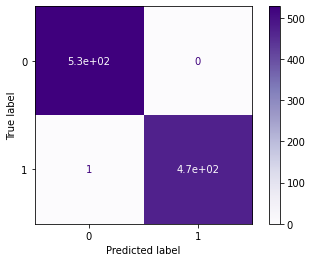

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_model, x_test, y_test,cmap='Purples')

Test Cases SVM

In [ ]:
pred_test_svc = svc_model.predict(lda_df_test.drop(columns = ['label']))

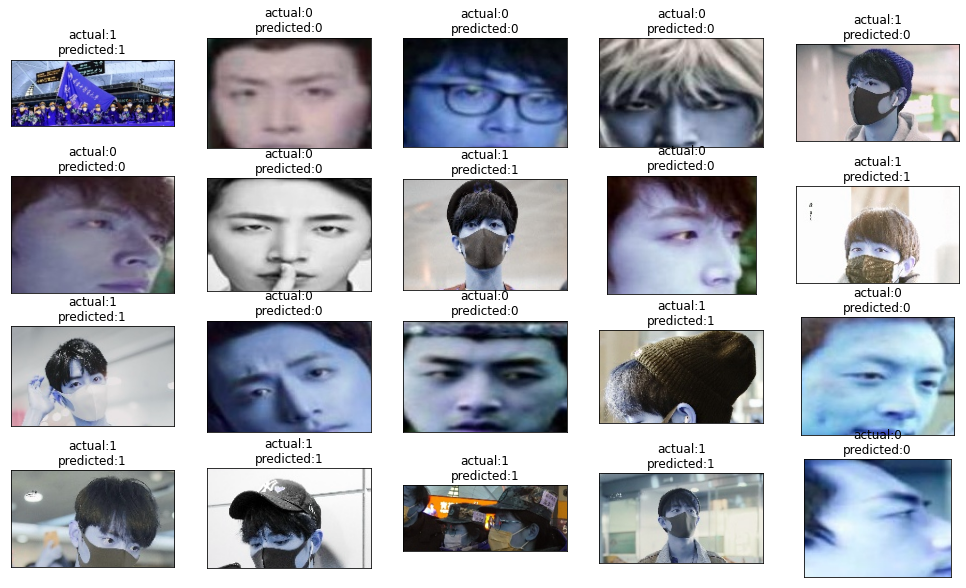

In [ ]:

fig, axes = plt.subplots(ncols=5, nrows=4, sharex=False,sharey=True, figsize=(17, 10))
index = 0
test_images = []
for i in range(20):
  test_images.append(df_test.values[i][0])
test_images[0]
test_cases = lda_df_test.drop(columns = ['label']).values
test_case_output = df_test[['label']].values.ravel()
for i in range(4):
    for j in range(5):
        axes[i,j].set_title('actual:' + str(test_case_output[index]) + '\n' 
                            + 'predicted:' + str(pred_test_svc[index]))
        k = cv2.imread(test_images[index])
        axes[i,j].imshow(k)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
    #print('\n')
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
h_p_2 = {'n_neighbors':[1,2,3,4],'leaf_size':[3,4,5,6]}
two = GridSearchCV(KNeighborsClassifier(), h_p_2)
two.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [3, 4, 5, 6],
                         'n_neighbors': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
two.best_params_

{'leaf_size': 3, 'n_neighbors': 2}

In [ ]:
knn_model = KNeighborsClassifier(leaf_size= 3, n_neighbors= 1)
knn_model.fit(x_train,y_train.values.ravel())
pred_knn = knn_model.predict(x_test)

In [ ]:
print("Train Accuracy = ",knn_model.score(x_train,y_train))
print("Testing Accuracy = ",knn_model.score(x_test,y_test))

Train Accuracy =  1.0
Testing Accuracy =  0.999


In [ ]:
scores_1=cross_val_score(knn_model,x_val,y_val.values.ravel(),cv=5,scoring = 'accuracy')
print("cv_scores of Linear Kernel:",scores_1)
print("Mean:",scores_1.mean())

cv_scores of Linear Kernel: [0.99 1.   1.   0.99 0.99]
Mean: 0.9940000000000001


In [ ]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       528
           1       1.00      1.00      1.00       472

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



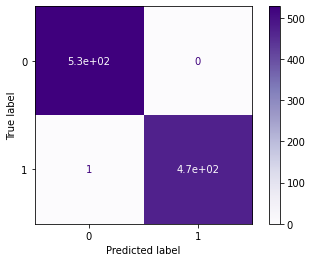

In [ ]:
plot_confusion_matrix(knn_model, x_test, y_test,cmap='Purples')

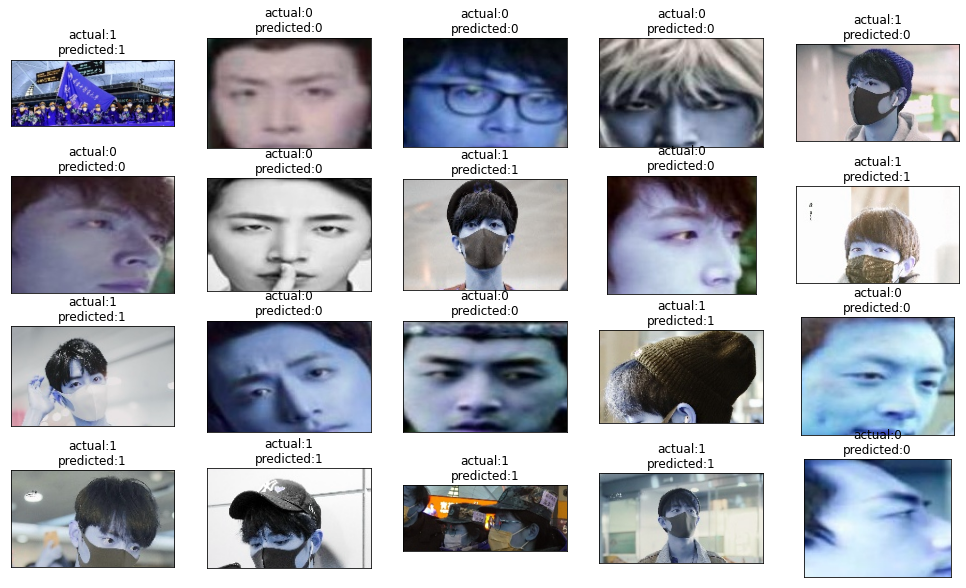

In [ ]:
pred_test_knn = knn_model.predict(lda_df_test.drop(columns = ['label']))

fig, axes = plt.subplots(ncols=5, nrows=4, sharex=False,sharey=True, figsize=(17, 10))
index = 0
test_images = []
for i in range(20):
  test_images.append(df_test.values[i][0])
test_images[0]
test_cases = lda_df_test.drop(columns = ['label']).values
test_case_output = df_test[['label']].values.ravel()
for i in range(4):
    for j in range(5):
        axes[i,j].set_title('actual:' + str(test_case_output[index]) + '\n' 
                            + 'predicted:' + str(pred_test_knn[index]))
        k = cv2.imread(test_images[index])
        axes[i,j].imshow(k)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
    #print('\n')
plt.show()

# Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
h_p_3 = {'hidden_layer_sizes': [(150,), (100,)],'activation': ['tanh', 'relu'],'alpha': [0.0001, 0.05]}
three = GridSearchCV(MLPClassifier(), h_p_3)
three.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_gr

In [ ]:
three.best_params_

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150,)}

In [ ]:
mlp_model = three.best_estimator_
mlp_model.fit(x_train,y_train.values.ravel())
pred_mlp = mlp_model.predict(x_test)

In [ ]:
print("Train Accuracy = ",mlp_model.score(x_train,y_train))
print("Testing Accuracy = ",mlp_model.score(x_test,y_test))

Train Accuracy =  0.997
Testing Accuracy =  0.999


In [ ]:
scores_2=cross_val_score(mlp_model,x_val,y_val.values.ravel(),cv=5,scoring = 'accuracy')
print("cv_scores of Linear Kernel:",scores_2)
print("Mean:",scores_2.mean())

cv_scores of Linear Kernel: [0.99 1.   1.   1.   0.99]
Mean: 0.9960000000000001


In [ ]:
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       528
           1       1.00      1.00      1.00       472

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



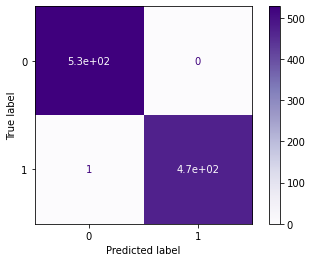

In [ ]:
plot_confusion_matrix(mlp_model, x_test, y_test,cmap='Purples')

# CNN

In [ ]:
print(X.shape)
print(Y_.shape)

(2000, 175, 175, 3)
(2000, 1)


In [ ]:
x_ = X/255

**RGB images**

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x_, Y_, test_size=0.5)

In [ ]:
cnn = Sequential()
layers = [
          Conv2D(filters = 32, kernel_size = (3,3), input_shape = x_[0].shape, activation ='relu',use_bias = True),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(filters = 64, kernel_size = (3,3)),
          MaxPool2D(pool_size=(2,2)),
]
for i in layers:
  cnn.add(i)

In [ ]:
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.add(Dense(1, activation='relu'))

In [ ]:
cnn.compile(loss='MeanSquaredError',
            optimizer='adam',
            metrics=['accuracy','mse'],
            steps_per_execution = 3)
stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
cnn.fit(x_tr,y_tr,batch_size=128,epochs=20,validation_data=(L, P_),callbacks=[stop])

Epoch 1/20
8/8 [==============================] - 46s 6s/step - loss: 0.1811 - accuracy: 0.7300 - mse: 0.1811 - val_loss: 0.0360 - val_accuracy: 0.9940 - val_mse: 0.0360
Epoch 2/20
8/8 [==============================] - 45s 6s/step - loss: 0.0361 - accuracy: 0.9925 - mse: 0.0361 - val_loss: 0.0308 - val_accuracy: 0.9970 - val_mse: 0.0308
Epoch 3/20
8/8 [==============================] - 45s 6s/step - loss: 0.0274 - accuracy: 0.9985 - mse: 0.0274 - val_loss: 0.0261 - val_accuracy: 0.9990 - val_mse: 0.0261
Epoch 4/20
8/8 [==============================] - 48s 6s/step - loss: 0.0268 - accuracy: 0.9954 - mse: 0.0268 - val_loss: 0.0421 - val_accuracy: 0.9680 - val_mse: 0.0421
Epoch 5/20
8/8 [==============================] - 46s 6s/step - loss: 0.0237 - accuracy: 0.9956 - mse: 0.0237 - val_loss: 0.0198 - val_accuracy: 0.9990 - val_mse: 0.0198
Epoch 6/20
8/8 [==============================] - 45s 6s/step - loss: 0.0192 - accuracy: 0.9990 - mse: 0.0192 - val_loss: 0.0271 - val_accuracy: 0.984

Text(0, 0.5, 'Loss')

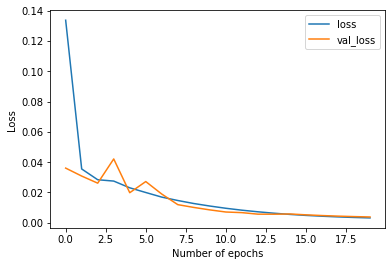

In [ ]:
loss = pd.DataFrame(cnn.history.history)
loss[['loss','val_loss']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

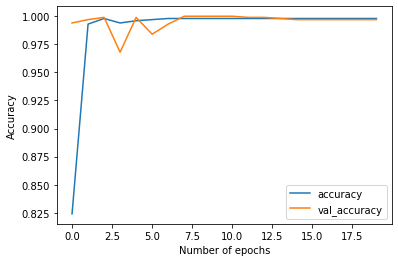

In [ ]:
loss[['accuracy','val_accuracy']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

In [ ]:
new_predictions = np.argmax(cnn.predict(x_te), axis=-1)

In [ ]:
print(cnn.metrics_names)
print(cnn.evaluate(x_te,y_te,verbose=0))

['loss', 'accuracy', 'mse']
[0.028150683268904686, 0.9940000176429749, 0.028150683268904686]


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 173, 173, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 86, 86, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 112896)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               14450816  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

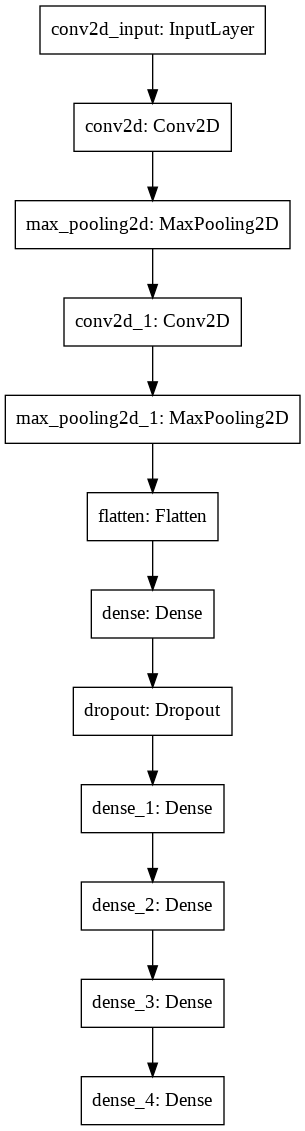

In [ ]:
from tensorflow import keras
keras.utils.plot_model(cnn)

**Model Performances**

In [ ]:
results = []
names = ['SVM','KNN','MLP','CNN']
results.append(scores)
results.append(scores_1)
results.append(scores_2)
results.append(loss['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


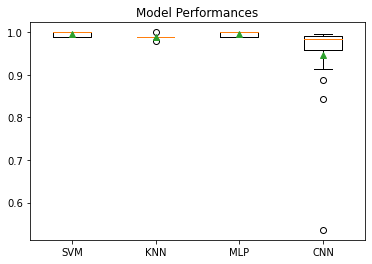

In [ ]:
plt.boxplot(results, labels=names,showmeans=True)
plt.title("Model Performances")
plt.show()

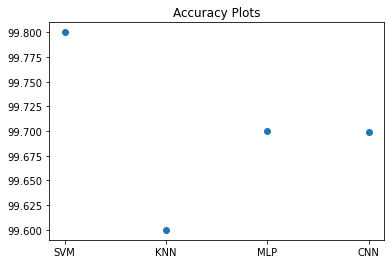

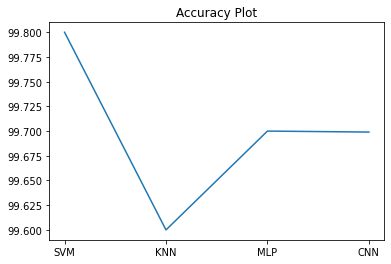

In [ ]:
names = ['SVM','KNN','MLP','CNN']
score_n = [99.8,99.6,99.7,99.699]
plt.title('Accuracy Plots')
plt.scatter(x=names, y=score_n)
plt.show()
plt.title('Accuracy Plot')
sns.lineplot(x=names,y=score_n)

# Data Augmentation

In [ ]:
Img = []
for i in df.values:
  k = cv2.imread(i[0])
  k.resize(175,175,3)
  Img.append(k)

Img = np.array(Img)
#Img = np.reshape(Img, (Img.shape[0], -1))

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(Img)

In [ ]:
x_batch, y_batch = datagen.flow(Img, Y_, batch_size = 9)[0]

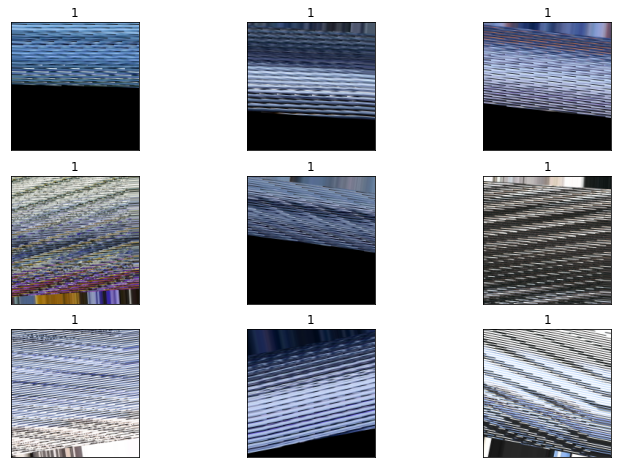

In [ ]:
#Augmented Images
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12,8))
index = 0
for i in range(3):
    for j in range(3):
        axes[i,j].set_title(labels[y_batch[index][0]])
        axes[i,j].imshow(x_batch[index].astype(np.uint8))
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()